Аналитическая формула: 1414.2135623730949
Численный: 1413


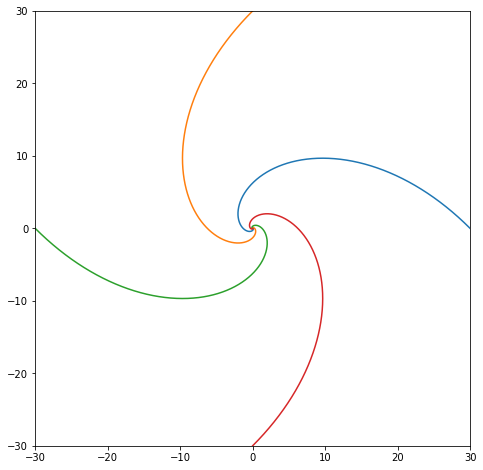

In [8]:
from plotly.offline import init_notebook_mode, iplot
import IPython.display as display
import matplotlib.pyplot as plt
import numpy as np
import random

def init_random(n):
    return np.random.rand(n), np.random.rand(n)
    
def init_on_circle(n, r):
    dangle = 2*np.pi / n
    xs = []
    ys = []

    angle = 0.0
    for i in range(n):
        xs.append(r * np.cos(angle))
        ys.append(r * np.sin(angle))
        angle += dangle
    return xs, ys

def turtles_step(xs, ys, vel, dtime):
    n = len(xs)
    for i in range(n):
        dx = xs[(i + 1) % n] - xs[i]
        dy = ys[(i + 1) % n] - ys[i]
        
        angle = np.angle(dx + 1j*dy)
        
        dr = vel * dtime
        
        stepx = dr * np.cos(angle)
        stepy = dr * np.sin(angle)
        xs[i] += stepx
        ys[i] += stepy

def do_sym(xs, ys, iters_max, vel, dtime):
    xtraj = [[x] for x in xs]
    ytraj = [[y] for y in ys]
    n = len(xs)
    for i in range(iters_max):
        turtles_step(xs, ys, vel, dtime)
        for j in range(n):
            xtraj[j].append(xs[j])
            ytraj[j].append(ys[j])
        
        rs = [np.sqrt(x**2 + y**2) for x, y in zip(xs, ys)]
        max_dist = max(rs)
        if max_dist < 2*vel:
            return xtraj, ytraj, i
    return xtraj, ytraj, iters_max
            
    
    
Nturt = 4
r = 30
velocity = 0.03
dtime = 1

xs, ys = init_on_circle(Nturt, r)

iters_max = 20000
xtraj, ytraj, iters = do_sym(xs, ys, iters_max, velocity, dtime)

plt.rcParams["figure.figsize"] = [8, 8]

plt.axis('square')
plt.axis([-r, r, -r, r])
        
for i in range(Nturt):
    plt.plot(xtraj[i], ytraj[i])
        
display.display(plt.gcf())
display.clear_output(wait=True)

print('Аналитическая формула: ' + str(r / (velocity * np.abs(np.cos((np.pi - 2*np.pi/Nturt) / 2)))))
print('Численный: ' + str(iters))